# 데이터 전처리
* 올바른 결과 도출을 위해서 데이터를 사용하기 전에 데이터 전처리 필요
* 전처리 과정을 거친 데이터로 훈련했을 때 차이 파악
* 표준점수로 특성의 스케일 변환하는 방법 학습

#### 나는 누구인가?

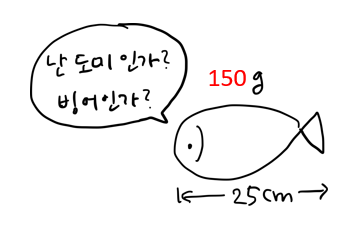

### 넘파이로 데이터 준비하기
* [코드 복사]http://bit.ly/bream_smelt

In [10]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

* 넘파이를 이용하여 입력, 타깃 데이터 생성

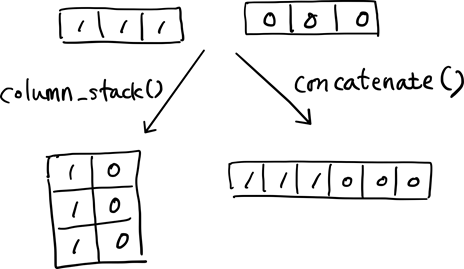

In [12]:
import numpy as np
fish_data = np.column_stack((fish_length, fish_weight))

In [14]:
fish_data[:5]

array([[ 25.4, 242. ],
       [ 26.3, 290. ],
       [ 26.5, 340. ],
       [ 29. , 363. ],
       [ 29. , 430. ]])

In [16]:
fish_target=np.concatenate((np.ones(35), np.zeros(14)))

In [18]:
fish_target

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### 사이킷런으로 훈련 세트와 테스트 세트 나누기
* 사이킷런의 train_test_split() 함수를 이용하여 세트 분리
  - 기본적으로 25%를 테스트 세트르 분리
 
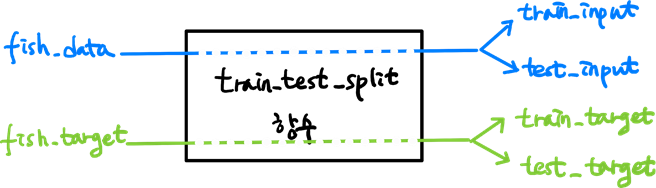

In [20]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state = 42)

In [22]:
train_input.shape, test_input.shape

((36, 2), (13, 2))

In [24]:
train_target.shape, test_target.shape

((36,), (13,))

In [26]:
test_target

array([1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [28]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state = 42,stratify=fish_target)

In [30]:
test_target

array([0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.])

* 13개의 테스트 세트 중에 10개가 도미(1)이고, 3개가 빙어(0) ==> 빙어의 비율이 적음
  - 원본 비율 : 2.5:1
  - 테스트 세트 비율 : 3.3:1 (샘플링 편항)
 
* 샘플링 편향을 제거하기 위해 train_test_split() 함수의 매개변수 stratify 사용

### 수상한 도미 한 마리

In [32]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [34]:
# 25cm, 150g의 도미 데이터를 입력해서 예측
kn.predict([[25,150]])

array([0.])

＊ 입력된 도미 데이터와 훈련 데이터의 관계를 시각화하여 파악

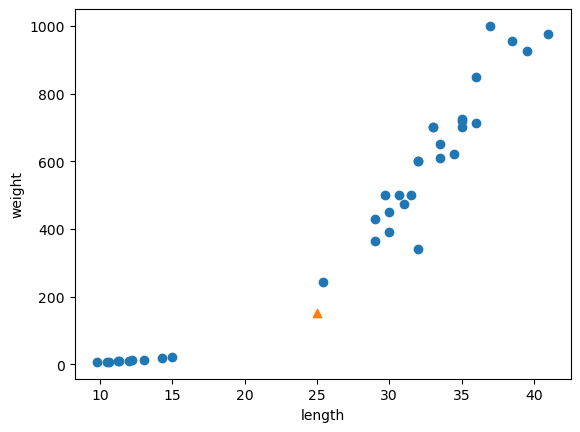

In [36]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

* 직관적으로 확인했을 떄 입력된 샘플 데이터는 오른쪽 위로 뻗어 있는 다른 도미 데이터에 더 가까워 보임
* 왜 왼쪽 아래에 낮게 깔린 빙어 데이터에 가깝다고 판단할까?


In [39]:
# 입력된 샘플에서 가장 가까운 이웃까지의 거리와 인덱스 체크
distances, indexes = kn.kneighbors([[25,150]])

In [45]:
distances

array([[ 92.00086956, 130.48375378, 130.73859415, 138.32150953,
        138.39320793]])

In [49]:
indexes

array([[21, 33, 19, 30,  1]], dtype=int64)

In [55]:
train_target[indexes]

array([[1., 0., 0., 0., 0.]])

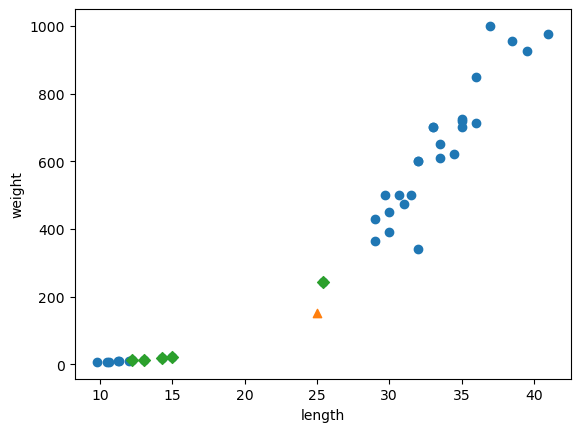

In [61]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
# 가장 가깝다고 판단한 5개 생선의 길이와 무게를 다른 표식을로 시각화
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [65]:
train_input[indexes]

array([[[ 25.4, 242. ],
        [ 15. ,  19.9],
        [ 14.3,  19.7],
        [ 13. ,  12.2],
        [ 12.2,  12.2]]])

In [69]:
train_target[indexes]

array([[1., 0., 0., 0., 0.]])

* 실제 도미를 도리라고 예측 못한 이유 추측
    - x축(길이)과 y축(무게)의 단위와 값의 범위가 다르기 떄문에 올바른 거리 측정이 안됨

### 기준을 맞춰라

* 이웃 샘플간의 거리 차이가 많이 나지 않는 이유는?
    - x축 값의 범위(0 ~ 40)와 y축 값의 범위(0~1,000)다름
    - y축으로 조금만 멀어져도 거리가 아주 큰 값으로 계산됨

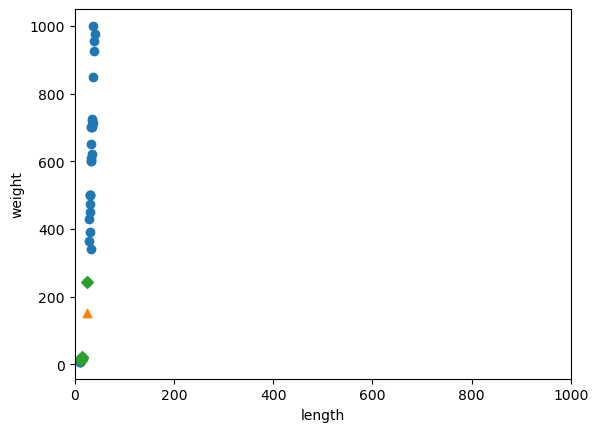

In [84]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
# 가장 가깝다고 판단한 5개 생선의 길이와 무게를 다른 표식을로 시각화
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlim(0, 1000) # x축의 범위를 0~10000으로 조정
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

* 산점도 그래프를 통해 알 수 있는 점
    - 생선의 길이(x축)는 가장 가까운 이웃을 찾는데 크게 영향을 미치지 않음
    - 생선의 무게(y축)는 크게 영향을 미침

#### [데이터 전처리(Data Preprocessing).]
* **스케일(scale)** 이 다른 특성값을 일정한 기준에 맞추어 조정하는 작업

---
* **표준점수(standard score)**
    - 각 특성값이 평균에서 표준편아츼 몇 배만큼 떨어져 있는지 계산
    - 실제 특성값의 크기와 상관없이 동일한 범위로 값을 조정 가능

In [89]:
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

In [91]:
mean, std

(array([ 27.29722222, 454.09722222]), array([  9.98244253, 323.29893931]))

* 표준점수 = ( 훈련 데이터 - 평균)/ 표준편차

In [94]:
train_scaled=(train_input - mean) /std

In [96]:
train_scaled

array([[ 0.24070039,  0.14198246],
       [-1.51237757, -1.36683783],
       [ 0.5712808 ,  0.76060496],
       [-1.60253587, -1.37766373],
       [ 1.22242404,  1.45655528],
       [ 0.17057727, -0.07453542],
       [ 0.87180845,  0.80390854],
       [ 0.87180845,  1.22457184],
       [ 0.37092904,  0.06465464],
       [ 0.77163257,  0.82246721],
       [ 0.97198434,  1.68853872],
       [-1.61255346, -1.3742613 ],
       [ 0.72154463,  0.51315596],
       [-1.53241275, -1.3742613 ],
       [ 0.17057727, -0.28177396],
       [ 0.5712808 ,  0.76060496],
       [ 0.34087627,  0.14198246],
       [ 1.12224816,  1.54934866],
       [ 0.62136874,  0.60594934],
       [-1.30200822, -1.34363949],
       [ 0.42101698,  0.14198246],
       [-0.19005591, -0.65604058],
       [-1.75279969, -1.38384995],
       [ 0.47110492,  0.45129371],
       [-1.68267658, -1.38137546],
       [ 0.62136874,  0.48222484],
       [-1.67265899, -1.38292202],
       [ 0.77163257,  0.76060496],
       [ 0.47110492,

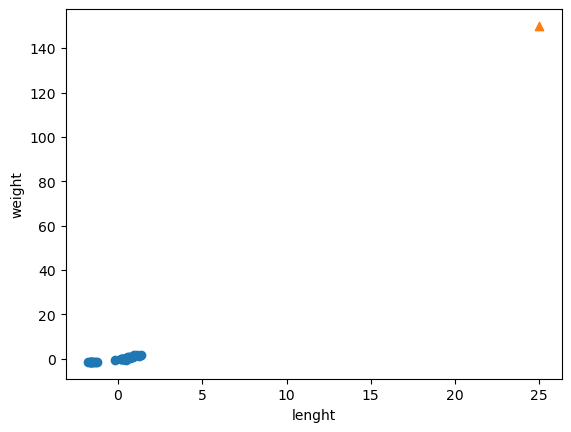

In [102]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25,150,marker='^')
plt.xlabel('lenght')
plt.ylabel('weight')
plt.show()

* 전처리를 거쳐 훈련 데이터의 스케일을 맞췄으면 **입력되는 샘플 데이터의 스케일도 동일하게 변경**하는 것이 필요
    - 훈련 데이터의 MEAN, STD를 사용하여 변경

In [119]:
new = ([25, 150] - mean)/std
new

array([-0.23012627, -0.94060693])

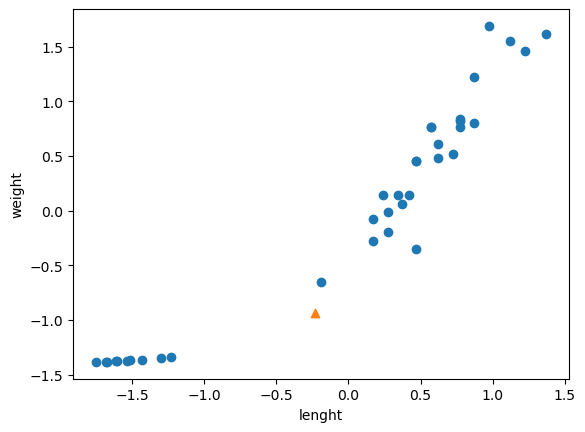

In [121]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0],new[1],marker='^')
plt.xlabel('lenght')
plt.ylabel('weight')
plt.show()

* x축, y축의 범위가 -1.5 ~ 1.5 사이로 걸정됨
* k-최근접 이웃 모델로 다시 훈련

In [124]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [126]:
# 훈련 세트와 동일하게 테스트 세트도 평균과 표준편차를 이용하여 변환
test_scaled = (test_input - mean) /std


In [130]:
kn.score(test_scaled, test_target)

1.0

In [134]:
kn.predict([new])

array([1.])

In [136]:
distaces, indexes = kn.kneighbors([new])

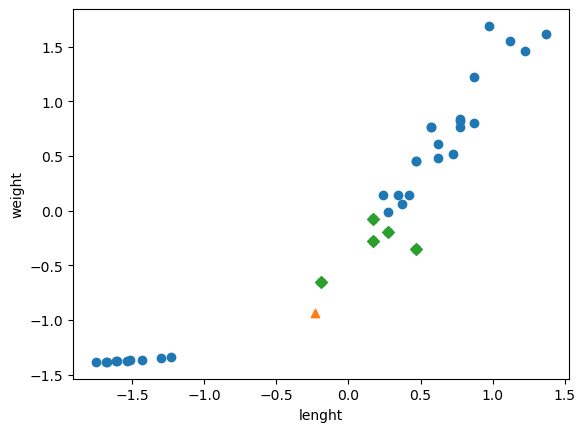

In [142]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0],new[1],marker='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes, 1], marker='D')
plt.xlabel('lenght')
plt.ylabel('weight')
plt.show()